In [10]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/rachyc/Desktop/new_data.csv')

In [4]:
df

,Unnamed: 0,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,0,2019-11-01 00:00:00 UTC,view,1003461,2053013555631882655,electronics.smartphone,xiaomi,489.07,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,1,2019-11-01 00:00:00 UTC,view,5000088,2053013566100866035,appliances.sewing_machine,janome,293.65,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,2,2019-11-01 00:00:01 UTC,view,17302664,2053013553853497655,NaN,creed,28.31,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,3,2019-11-01 00:00:01 UTC,view,3601530,2053013563810775923,appliances.kitchen.washer,lg,712.87,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,4,2019-11-01 00:00:01 UTC,view,1004775,2053013555631882655,electronics.smartphone,xiaomi,183.27,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2
...,...,...,...,...,...,...,...,...,...,...
9999995,9999995,2019-11-07 05:08:21 UTC,view,1005115,2053013555631882655,electronics.smartphone,apple,915.69,517800555,c6b764e0-561c-4c17-a546-2e922196bb49
9999996,9999996,2019-11-07 05:08:21 UTC,view,12707281,2053013553559896355,NaN,gislaved,90.86,539095445,b1673b33-d0ff-4a09-bf57-56dedc3d016e
9999997,9999997,2019-11-07 05:08:21 UTC,view,3601405,2053013563810775923,appliances.kitchen.washer,beko,180.16,548916637,e020a307-551c-4e58-a787-126701d30d41
9999998,9999998,2019-11-07 05:08:21 UTC,view,12711053,2053013553559896355,NaN,tunga,32.69,521586999,c8c48941-2ca1-4ce4-8d44-c96eb5df4fb5


In [18]:
df.groupby(['brand','event_type'])['price'].mean().to_frame()

price
brand              event_type            
a-case             purchase      4.666471
                   view         14.674705
a-derma            view         13.292632
a-elita            view         50.412941
a-mega             purchase     66.930000
...                                   ...
zvezda             view         42.650000
zwerg              view         23.295000
zwilling           view        168.924000
zwillingjahenckels view        883.973300
zyxel              view        188.011220

[5086 rows x 1 columns]

In [20]:
df.groupby(['category_code','event_type'])['price'].mean().to_frame()

price
category_code        event_type            
accessories.bag      cart         18.534375
                     purchase     39.765667
                     view         65.353174
accessories.umbrella purchase     21.167143
                     view         18.715435
...                                     ...
sport.trainer        purchase    284.970704
                     view        382.878994
stationery.cartrige  cart         27.204667
                     purchase     19.317660
                     view         27.951226

[328 rows x 1 columns]

In [26]:
df.groupby(['user_id','event_type','category_code'])['price'].mean().to_frame().sort_values('user_id')

,,,price
user_id,event_type,category_code,
170180460,view,electronics.smartphone,131.28
208701646,view,furniture.bedroom.blanket,31.32
214470341,view,computers.components.hdd,64.04
216064734,view,electronics.smartphone,526.40
222349603,view,electronics.smartphone,555.43
...,...,...,...
568422406,view,electronics.video.tv,166.54
568422411,view,electronics.video.tv,166.54
568422412,view,electronics.video.tv,381.74


In [28]:
df[(df['category']=='electronics.smartphone	')&(df['event_type']=='electronics.smartphone	')]

,Unnamed: 0,event_time,product_id,category_id,category_code,brand,price,user_id,user_session
event_type,,,,,,,,,
cart,121767,121767,121767,121767,106959,120074,121767,121767,121767
purchase,147105,147105,147105,147105,105521,135700,147105,147105,147105
view,9731128,9731128,9731128,9731128,6484730,8333763,9731128,9731128,9731128


<Axes: xlabel='event_type', ylabel='Count'>

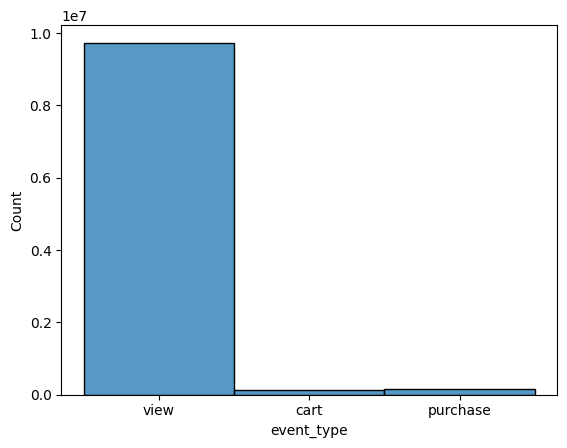

In [11]:
sns.histplot(df['event_type'])

<Axes: xlabel='event_type', ylabel='price'>

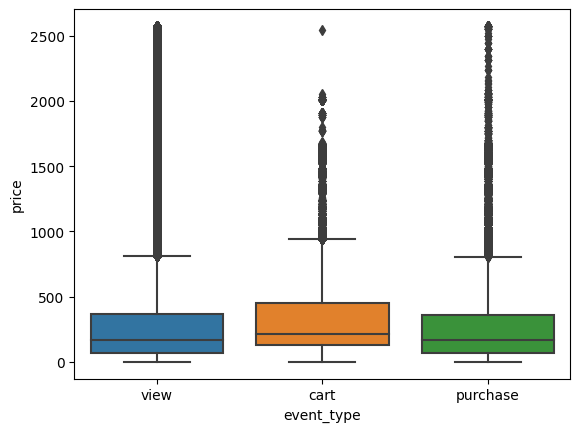

In [12]:
sns.boxplot(data = df.reset_index(), x = 'event_type', y ='price')

In [13]:
sns.boxplot(data = df.reset_index(), x = 'event_type', y ='brand')

TypeError: Neither the `x` nor `y` variable appears to be numeric.

In [15]:
df.groupby('brand')['price'].aggregate(['min','max','mean'])

,min,max,mean
brand,,,
a-case,1.26,154.44,14.556634
a-derma,5.15,21.88,13.292632
a-elita,8.49,73.28,50.412941
a-mega,41.19,218.80,73.707460
aardwolf,8.98,79.15,65.116000
...,...,...,...
zvezda,38.87,45.17,42.650000
zwerg,11.36,35.23,23.295000
zwilling,52.77,246.36,168.924000
